#import all libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/attrition/Attrition.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


With the proliferation of companies and the diversification of jobs, coupled with an increasing number of employees and various financial burdens on individuals, the easier decision for an employee in many cases is to leave and seek alternative opportunities. Therefore, companies must assess each individual's situation, especially since there has been a recent increase in employee turnover. This not only casts a negative impression on the company but also leads to the loss of highly experienced personnel. 

Today, we are here to study the factors that contribute to employee departures and assist companies in understanding their employees, grasping their needs, and helping the company anticipate internal changes. Will the employee leave or stay? With this understanding of strategy, we aim to help companies retain their employees while also providing factors that attract new employees to the company.

In [3]:
#import data set to study
Data=pd.read_csv("/kaggle/input/attrition/Attrition.csv")
Data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


identify each column

In [4]:
duplicates = Data.duplicated()
duplicates.duplicates = Data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

#there is no duplicates

In [5]:
Data.isnull().sum()/Data.shape[0]*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

there is no missing value

In [6]:
#identify datatype of column to deal with it easily
Data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

"We will study the data we have by posing some questions and answering them."

1.How Is Attrition Affected by Gender?

In [7]:
count_gender_and_male=Data["Gender"].value_counts()
count_gender_and_male

Male      882
Female    588
Name: Gender, dtype: int64

#Male and female are not equlll so we will take radoms sample from them are equal

In [8]:
male_data = Data[Data["Gender"] == "Male"].sample(n=588)
female_data = Data[Data["Gender"] == "Female"].sample(n=588)
sampled_data = pd.concat([male_data, female_data])

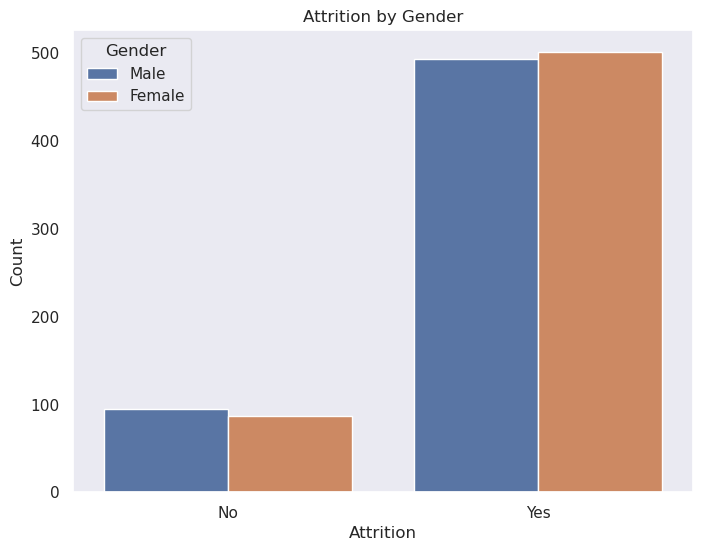

In [9]:
plt.figure(figsize=(8, 6))
sns.set(style="dark")
sns.countplot(data=sampled_data, x="Attrition", hue="Gender")
plt.title("Attrition by Gender")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title="Gender")
plt.show()

There are Almost equall in twa cases("yes","no")  The gender do not affect on Attrition

2. How Is Attrition Affected by business travel?

In [10]:
x=Data["BusinessTravel"].value_counts()
print(x)


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [11]:
A= Data[Data["BusinessTravel"] == "Travel_Rarely"].sample(n=150) 
B= Data[Data["BusinessTravel"] == "Travel_Frequently"].sample(n=150)
C= Data[Data["BusinessTravel"] == "Non-Travel"].sample(n=150)
sampled_data = pd.concat([A,B,C])
sampled_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
699,52,No,Travel_Rarely,1053,Research & Development,1,2,Life Sciences,1,976,...,2,80,1,26,2,2,9,8,7,8
1200,44,No,Travel_Rarely,528,Human Resources,1,3,Life Sciences,1,1683,...,1,80,3,8,2,3,2,2,2,2
138,25,No,Travel_Rarely,959,Sales,28,3,Life Sciences,1,183,...,4,80,0,6,3,3,2,2,2,2
1429,39,No,Travel_Rarely,116,Research & Development,24,1,Life Sciences,1,2014,...,1,80,0,18,2,3,7,7,1,7
870,35,No,Travel_Rarely,1361,Sales,17,4,Life Sciences,1,1218,...,4,80,3,15,2,3,7,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,28,No,Non-Travel,1103,Research & Development,16,3,Medical,1,1947,...,3,80,0,5,3,2,5,3,1,4
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,4,80,0,0,0,3,0,0,0,0
1320,42,No,Non-Travel,355,Research & Development,10,4,Technical Degree,1,1854,...,2,80,2,10,1,2,6,3,3,3
1240,39,No,Non-Travel,792,Research & Development,1,3,Life Sciences,1,1737,...,4,80,1,9,2,3,9,8,5,8


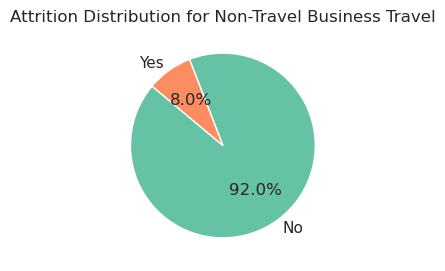

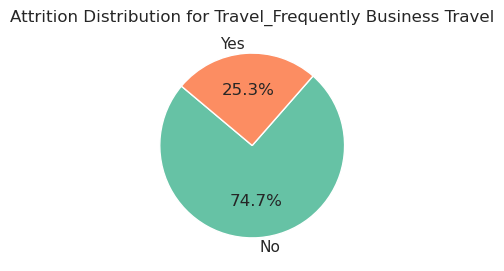

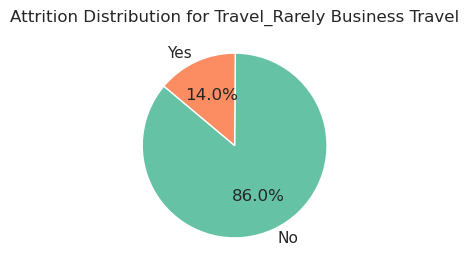

In [12]:
custom_palette = sns.color_palette("Set2")

attrition_counts = sampled_data.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Count')
for travel_category in attrition_counts['BusinessTravel'].unique():
    travel_category_data = attrition_counts[attrition_counts['BusinessTravel'] == travel_category]

    plt.figure(figsize=(3, 3))
    plt.pie(travel_category_data['Count'], labels=travel_category_data['Attrition'], autopct="%1.1f%%", 
            startangle=140, colors=custom_palette)
    plt.title(f"Attrition Distribution for {travel_category} Business Travel")
    plt.show()

"We observe a retention bias after taking an equal random sample."
but  we notice an increase that reaches up to a quarter of the random sample 
"As the frequency of travel increases, the number of those who leave the job also increases.

3. what is effect of the distance from home on attrition ?

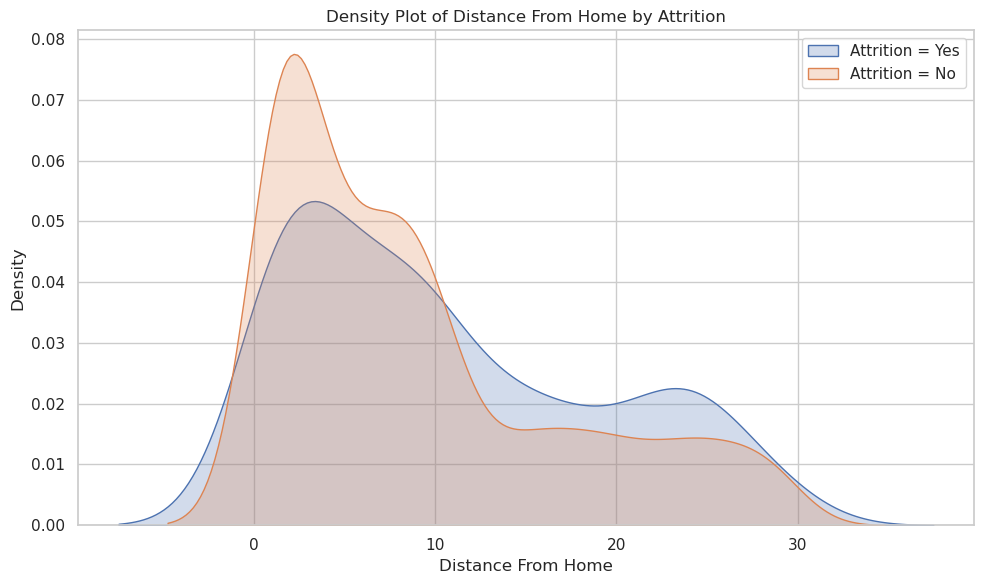

In [13]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(data=Data[Data['Attrition'] == 'Yes'], x='DistanceFromHome', fill=True, label='Attrition = Yes')
sns.kdeplot(data=Data[Data['Attrition'] == 'No'], x='DistanceFromHome', fill=True, label='Attrition = No')
plt.title("Density Plot of Distance From Home by Attrition")
plt.xlabel("Distance From Home")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


"We observe a steeper slope of the blue curve on the right side with an increase in the distance."






4. What is the most Department of attritions ?

In [14]:
left=Data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
Yes_attrition_data = left[left['Attrition'] == 'Yes']

# Create the donut chart
fig = px.pie(Yes_attrition_data, values='Count', names='Department', title='Attrition by Department (Yes Attrition)',
             hole=0.5, color_discrete_sequence=['brown'])

# Display the chart
fig.update_traces(textinfo='percent+label')
fig.show()

5. what is effect of YearsWithCurrManager on attrition ?

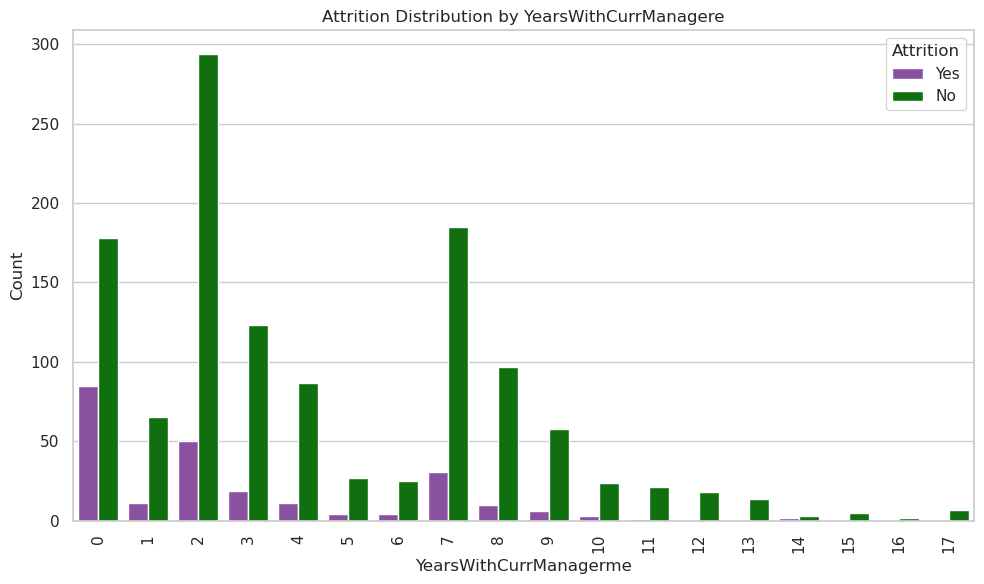

In [15]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
custom_color = "#8E44AD"
sns.countplot(data=Data, x='YearsWithCurrManager', hue='Attrition', palette=[custom_color, "green"])
plt.title("Attrition Distribution by YearsWithCurrManagere")
plt.xlabel("YearsWithCurrManagerme")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

 6.What is the most job role of attritions ?

In [16]:
attrition_counts_by_job = Data[Data['Attrition'] == 'Yes'].groupby('JobRole').size().reset_index(name='Count')
styled_df = attrition_counts_by_job.style.applymap(lambda count: 'background-color: lightblue', subset=['Count'])
styled_df

,JobRole,Count
0,Healthcare Representative,9
1,Human Resources,12
2,Laboratory Technician,62
3,Manager,5
4,Manufacturing Director,10
5,Research Director,2
6,Research Scientist,47
7,Sales Executive,57
8,Sales Representative,33


 7.Is salary is one of the main reasons? 


8.Do Education Field play a role? 

In [17]:
# Do Education Field play a role? 
fig = px.bar(Data, x="EducationField", color="Attrition", title="Attrition by Education Field",
             color_discrete_map={"Yes": "red", "No": "blue"})
fig.show()



9.Do Education Field play a role? 

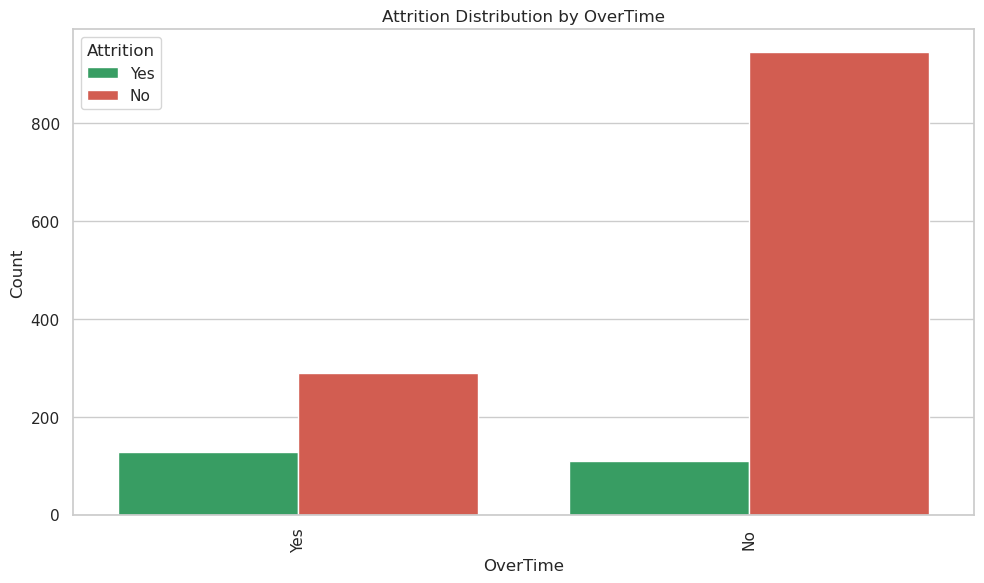

In [18]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
custom_color = "#27AE60" 
sns.countplot(data=Data, x='OverTime', hue='Attrition', palette=[custom_color, "#E74C3C"])
plt.title("Attrition Distribution by OverTime")
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


10. Is it possible that employees are leaving because of the work environment? 

11. What factors are contributing more to employee attrition?

/tmp/ipykernel_20/1225759886.py:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



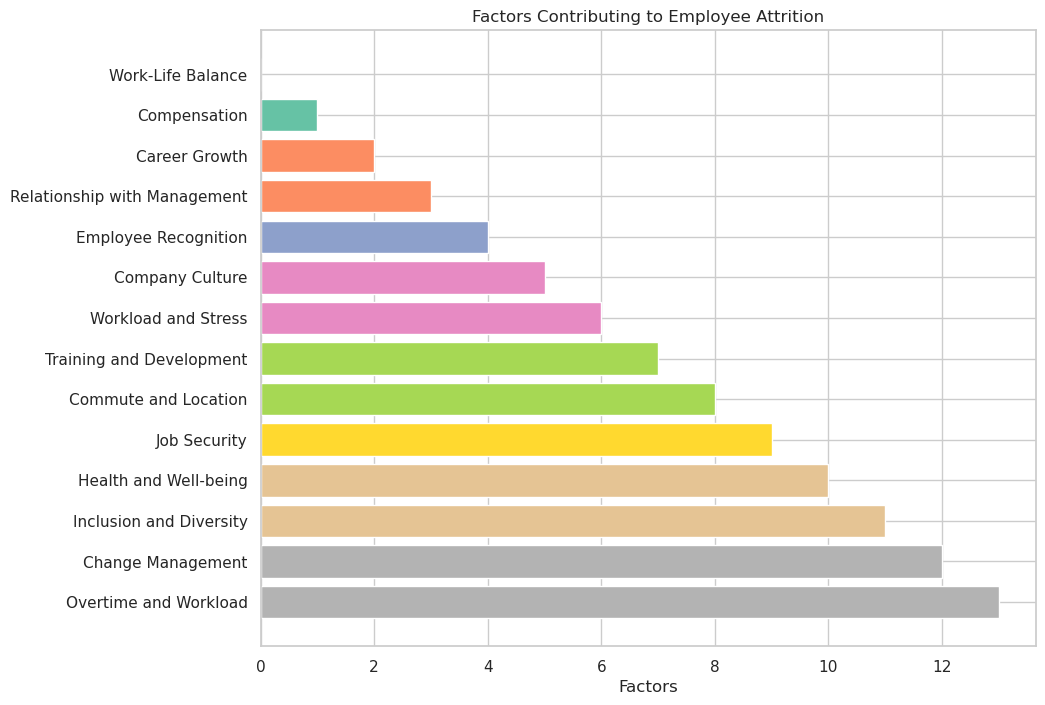

In [19]:
import matplotlib.pyplot as plt

factors = [
    "Work-Life Balance",
    "Compensation",
    "Career Growth",
    "Relationship with Management",
    "Employee Recognition",
    "Company Culture",
    "Workload and Stress",
    "Training and Development",
    "Commute and Location",
    "Job Security",
    "Health and Well-being",
    "Inclusion and Diversity",
    "Change Management",
    "Overtime and Workload"
]

# Choose a color palette from Matplotlib's available options
color_palette = plt.cm.get_cmap('Set2', len(factors))

plt.figure(figsize=(10, 8))
plt.barh(factors, range(len(factors)), color=color_palette(range(len(factors))))
plt.xlabel('Factors')
plt.title('Factors Contributing to Employee Attrition')
plt.gca().invert_yaxis() 
plt.show()


12. What type of measures should the company take in order to retain their 
employees? 

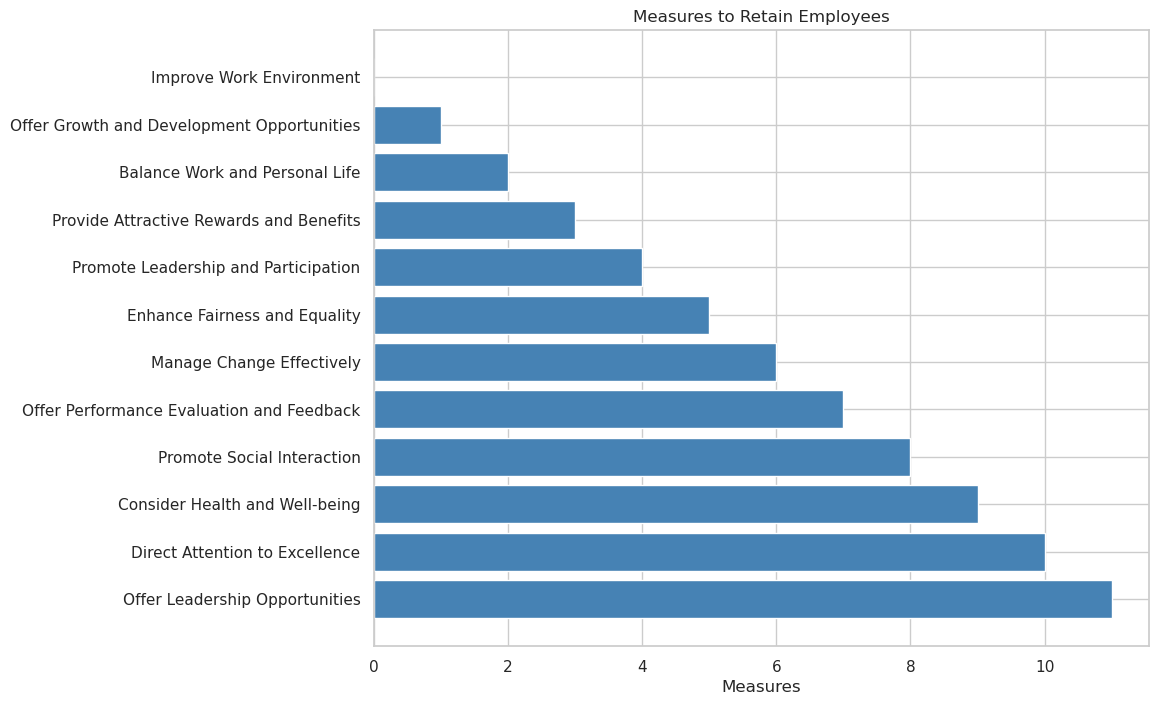

In [20]:
import matplotlib.pyplot as plt

measures = [
    "Improve Work Environment",
    "Offer Growth and Development Opportunities",
    "Balance Work and Personal Life",
    "Provide Attractive Rewards and Benefits",
    "Promote Leadership and Participation",
    "Enhance Fairness and Equality",
    "Manage Change Effectively",
    "Offer Performance Evaluation and Feedback",
    "Promote Social Interaction",
    "Consider Health and Well-being",
    "Direct Attention to Excellence",
    "Offer Leadership Opportunities"
]

plt.figure(figsize=(10, 8))
plt.barh(measures, range(len(measures)), color='steelblue')
plt.xlabel('Measures')
plt.title('Measures to Retain Employees')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest measure at the top
plt.show()


13. what is effect of age on attrition ? 

In [21]:
age_attrition_counts = Data.groupby(['Age', 'Attrition']).size().reset_index(name='Count')
fig = px.bar(age_attrition_counts, x='Count', y='Age', color='Attrition', orientation='h',
             title='Effect of Age on Attrition',
             labels={'Age': 'Age', 'Count': 'Count', 'Attrition': 'Attrition'})
fig.show()


14. Is income the main factor towards employee attrition?

15. Does the Department of work impact attrition? 

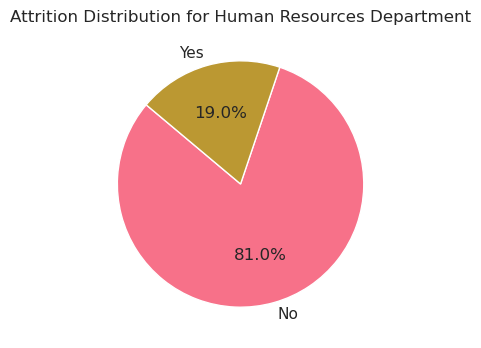

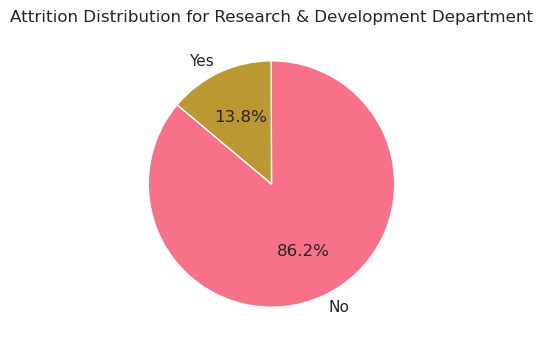

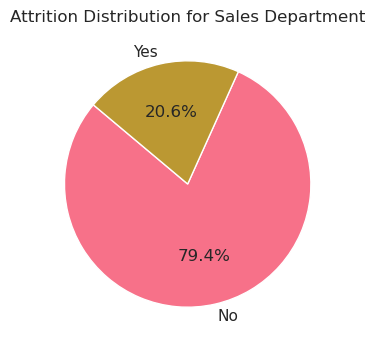

In [22]:
custom_palette = sns.color_palette("husl")
attrition_counts = Data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

for travel_category in attrition_counts['Department'].unique():
    travel_category_data = attrition_counts[attrition_counts['Department'] == travel_category]

    plt.figure(figsize=(4, 4))
    plt.pie(travel_category_data['Count'], labels=travel_category_data['Attrition'], autopct="%1.1f%%", 
            startangle=140, colors=custom_palette)
    plt.title(f"Attrition Distribution for {travel_category} Department")
    plt.show()


In [23]:
#first should know the value in this column
Data["EnvironmentSatisfaction"].unique()

array([2, 3, 4, 1])

In [24]:
attrition_counts_by_job = Data[Data['Attrition'] == 'Yes'].groupby('EnvironmentSatisfaction').size().reset_index(name='Count')
styled_df = attrition_counts_by_job.style.applymap(lambda count: 'background-color: lightblue', subset=['Count'])
styled_df

,EnvironmentSatisfaction,Count
0,1,72
1,2,43
2,3,62
3,4,60


17. How does self Job Satisfaction impact the Attrition?

<Figure size 1000x600 with 0 Axes>

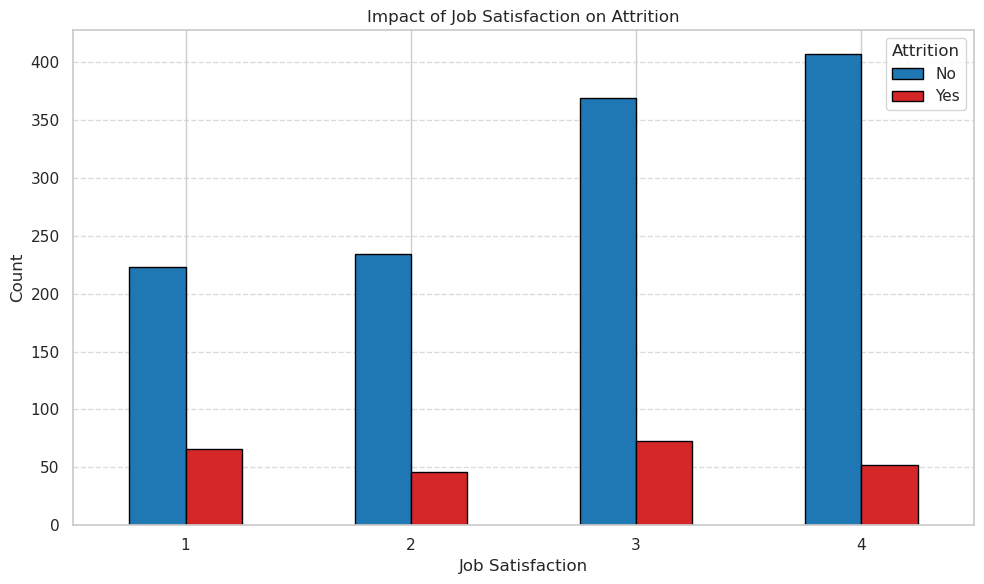

In [25]:
grouped = Data.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')
pivot_df = grouped.pivot(index='JobSatisfaction', columns='Attrition', values='Count')
plt.figure(figsize=(10, 6))
ax = pivot_df.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#d62728'], edgecolor='black', linewidth=1)
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Impact of Job Satisfaction on Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

19. How does Work Life Balance impact the overall attrition rates?

In [26]:
left=Data.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Count')
Yes_attrition_data = left[left['Attrition'] == 'Yes']
custom_colors = ['brown', 'purple', 'blue', 'green']

fig = px.pie(Yes_attrition_data, values='Count', names='WorkLifeBalance', title='Attrition by Department (Yes Attrition)',
             hole=0.5, color_discrete_sequence=custom_colors)
fig.update_traces(textinfo='percent+label')
fig.show()